<a href="https://colab.research.google.com/github/qtncyy/229352-StatisticalLearning/blob/main/660510740_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [26]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()
# 0 ไม่เป็น
# 1 เป็น

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [27]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [28]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [29]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=9)

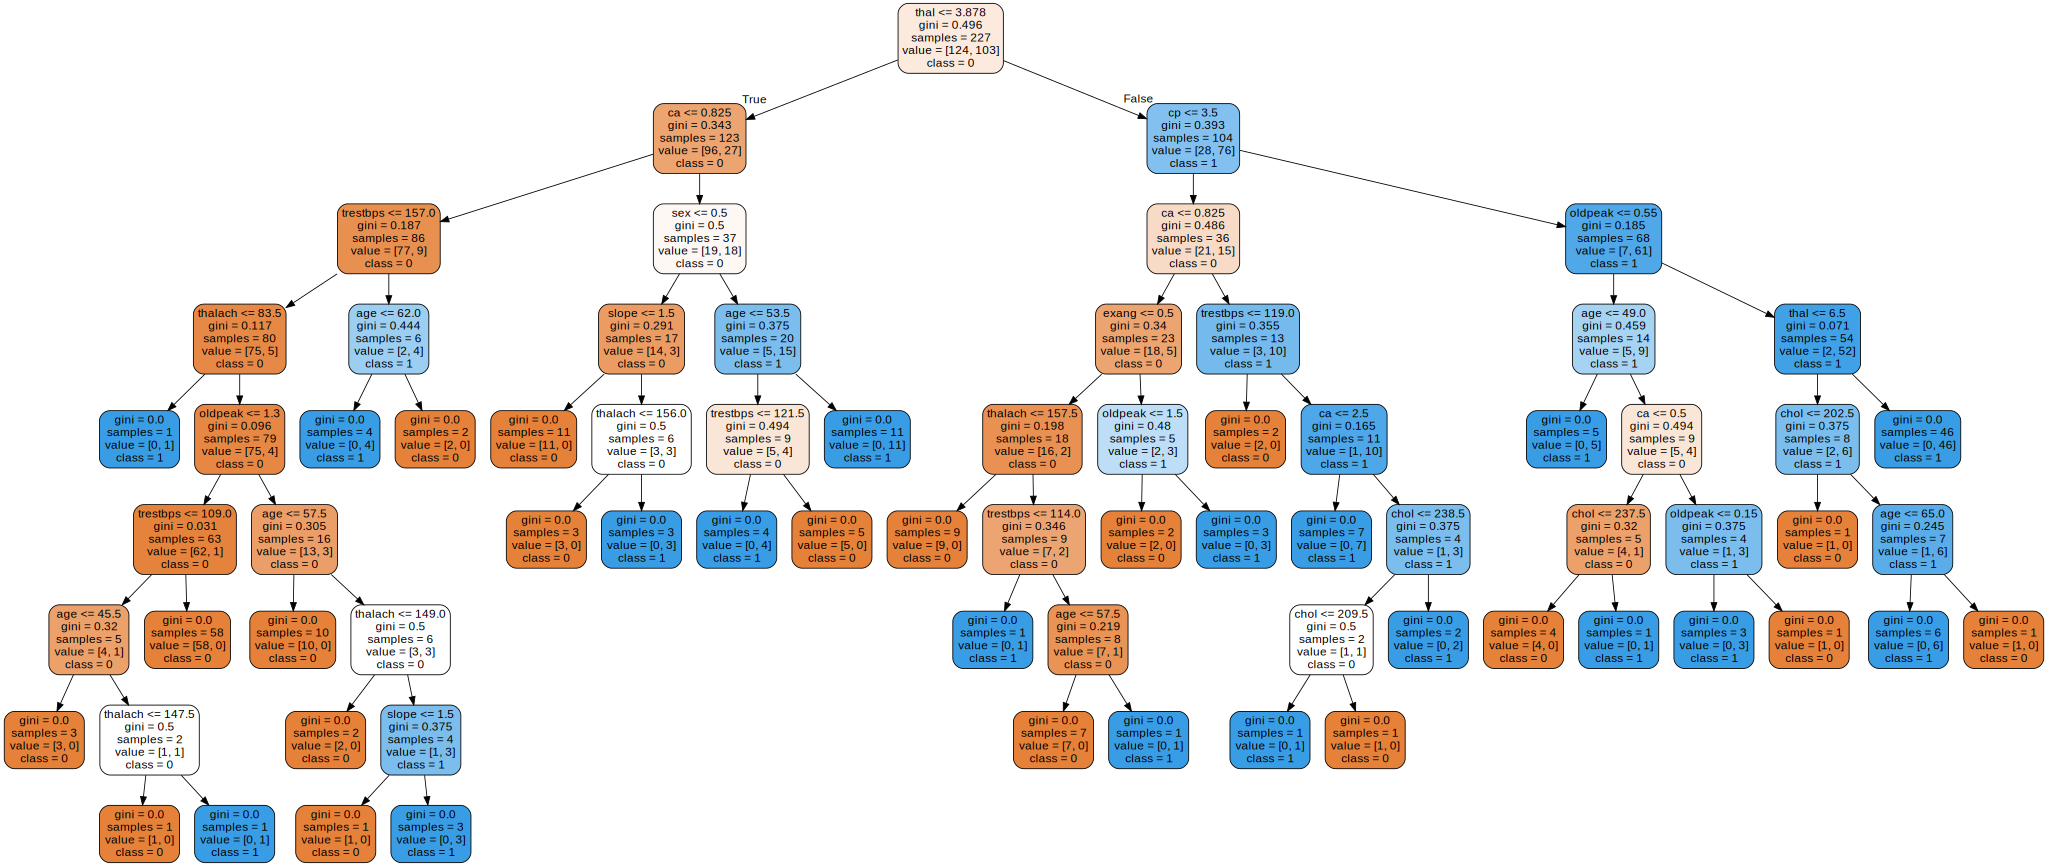

In [30]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [31]:
data.columns[:-1] # เอาแค่ตัวแปรต้น ลบตัวแปรตาม

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [32]:
clf = DecisionTreeClassifier()

In [33]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )

bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.88      0.78      0.82        36

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [34]:
forest = RandomForestClassifier(
    n_estimators=200, max_depth=6
    )

forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        40
           1       0.87      0.72      0.79        36

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

**Decision Tree**

In [35]:
from sklearn.metrics import f1_score, accuracy_score

# Decision Tree
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', DecisionTreeClassifier())
])

dt_params = {
    'clf__max_depth': [4, 6, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ["gini", "entropy", "log_loss"]
}

dt_grid_search = GridSearchCV(dt_pipeline, dt_params, scoring=['accuracy', 'f1_macro'], refit='accuracy', cv=5)
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'clf__max_depth': [4, 6, 10, 20],
                         'clf__min_samples_split': [2, 5, 10]},
             refit='accuracy', scoring=['accuracy', 'f1_macro'])

In [36]:
print(classification_report(y_test, dt_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        40
           1       0.83      0.69      0.76        36

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.79        76
weighted avg       0.80      0.79      0.79        76



In [37]:
print("Decision Tree Results:")
print("Best parameters:", dt_grid_search.best_params_)
dt_pred = dt_grid_search.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, dt_pred))
print("F1 Macro:", f1_score(y_test, dt_pred, average='macro'))

Decision Tree Results:
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_split': 5}

Accuracy: 0.7894736842105263
F1 Macro: 0.7857646229739252


**Bagged Decision Trees**

In [38]:
# Bagged Decision Trees
bagged_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

bagged_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_samples': [0.6, 0.8, 1.0],
    'clf__max_features': [0.6, 0.8, 1.0]
}

bagged_grid_search = GridSearchCV(bagged_pipeline, bagged_params, scoring=['accuracy', 'f1_macro'], refit='accuracy', cv=5)
bagged_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'clf__max_features': [0.6, 0.8, 1.0],
                         'clf__max_samples': [0.6, 0.8, 1.0],
                         'clf__n_estimators': [50, 100, 200]},
             refit='accuracy', scoring=['accuracy', 'f1_macro'])

In [39]:
print(classification_report(y_test, bagged_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.89      0.69      0.78        36

    accuracy                           0.82        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.83      0.82      0.81        76



In [40]:
print("Bagged Decision Trees Results:")
print("Best parameters:", bagged_grid_search.best_params_)
bagged_pred = bagged_grid_search.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, bagged_pred))
print("F1 Macro:", f1_score(y_test, bagged_pred, average='macro'))

Bagged Decision Trees Results:
Best parameters: {'clf__max_features': 0.6, 'clf__max_samples': 0.6, 'clf__n_estimators': 50}

Accuracy: 0.8157894736842105
F1 Macro: 0.8110795454545454


**Random Forest**

In [41]:
# Random Forest
forest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', RandomForestClassifier())
])

forest_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10]
}

forest_grid_search = GridSearchCV(forest_pipeline, forest_params, scoring=['accuracy', 'f1_macro'], refit='accuracy', cv=5)
forest_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_depth': [3, 6, 9, 12],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [50, 100, 200]},
             refit='accuracy', scoring=['accuracy', 'f1_macro'])

In [42]:
print(classification_report(y_test, forest_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        40
           1       0.96      0.72      0.83        36

    accuracy                           0.86        76
   macro avg       0.88      0.85      0.85        76
weighted avg       0.88      0.86      0.85        76



In [43]:
print("Random Forest Results:")
print("Best parameters:", forest_grid_search.best_params_)
forest_pred = forest_grid_search.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, forest_pred))
print("F1 Macro:", f1_score(y_test, forest_pred, average='macro'))

Random Forest Results:
Best parameters: {'clf__max_depth': 3, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Accuracy: 0.8552631578947368
F1 Macro: 0.850900659889424


# **Best Model**

In [44]:
best_model = None
best_accuracy = 0

if dt_grid_search.best_score_ > best_accuracy:
    best_accuracy = dt_grid_search.best_score_
    best_model = "Decision Tree"

if bagged_grid_search.best_score_ > best_accuracy:
    best_accuracy = bagged_grid_search.best_score_
    best_model = "Bagged Decision Trees"

if forest_grid_search.best_score_ > best_accuracy:
    best_accuracy = forest_grid_search.best_score_
    best_model = "Random Forest"

print(f"The best model based on cross-validation accuracy is {best_model}")

The best model based on cross-validation accuracy is Random Forest


# **Plot the best tree model**

Plotting the best Random Forest model:


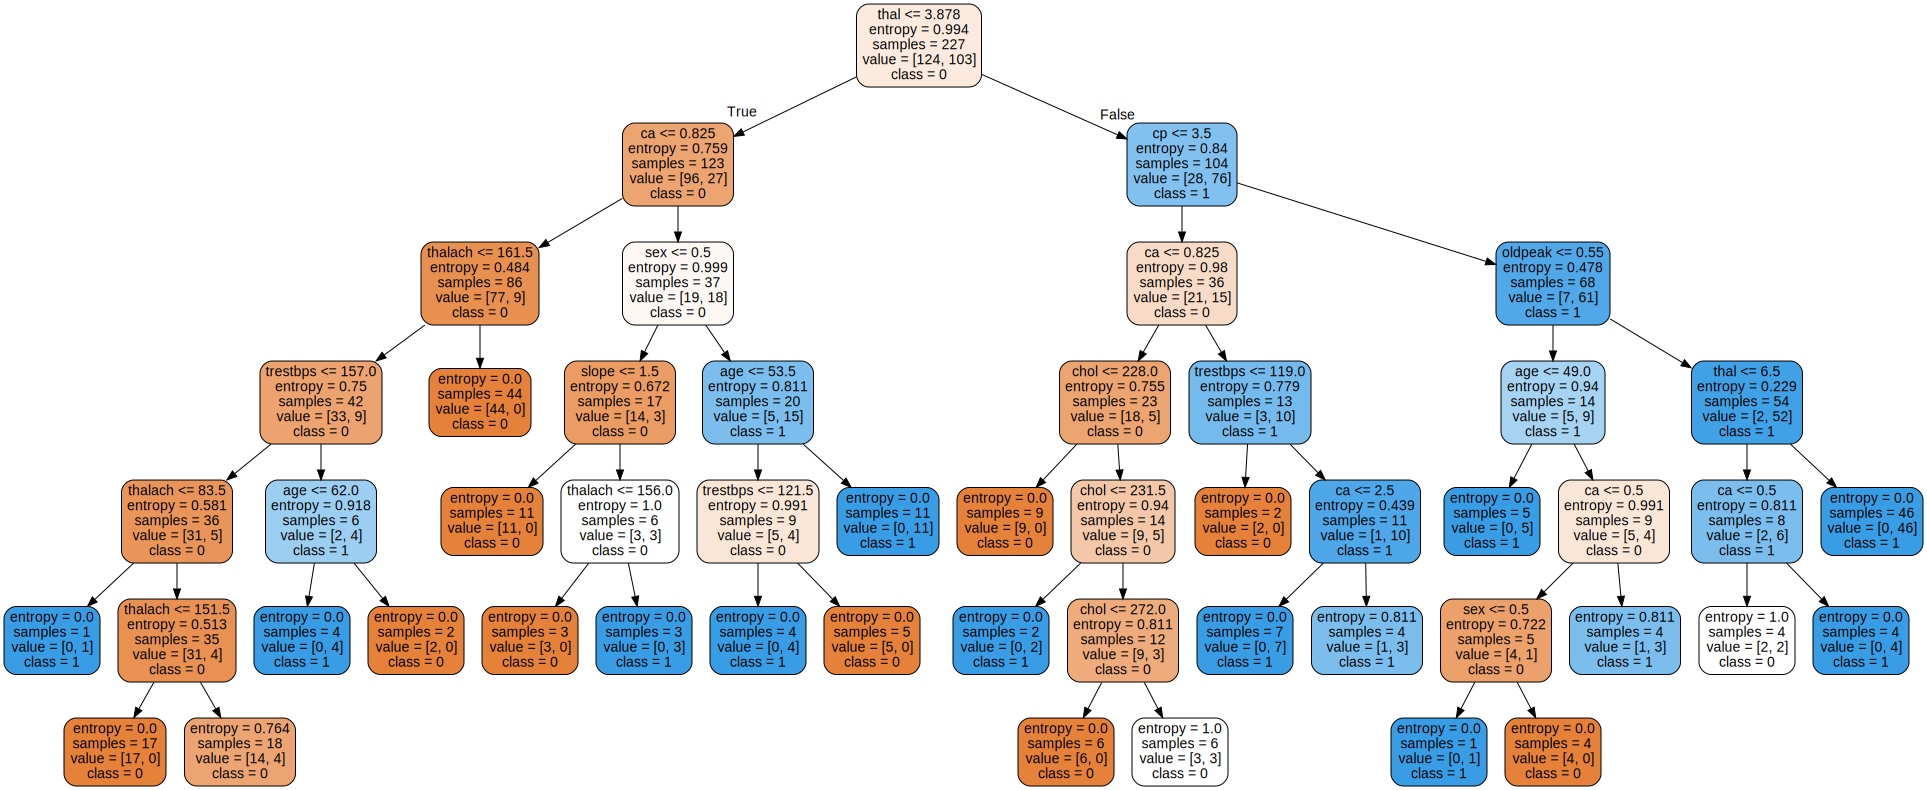

In [45]:
print(f"Plotting the best {best_model} model:")
plot_data = export_graphviz(dt_grid_search.best_estimator_.named_steps['clf'],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

**Decision Tree**

เลือกใช้

1.   ความลึกของต้นไม้สูงสุด: ควบคุมไม่ให้ต้นไม้แตกย่อยลึกเกินไป ลดโอกาส overfitting
2.   จำนวนข้อมูลขั้นต่ำที่ต้องมีเพื่อแบ่ง node: ถ้าอยากแยกโหนด ต้องให้มีจำนวนข้อมูลขั้นต่ำก่อน เพื่อเลี่ยงการแบ่งจากกลุ่มข้อมูลเล็กๆ ลด overfitting
3.   การวัดความบริสุทธิ์ของ node: ดูว่าแบ่งข้อมูลได้ดีแค่ไหน
เพื่อให้การแยกข้อมูลมีประสิทธิภาพที่สุด


**Bagged Decision Trees**

เลือกใช้

1.   จำนวนต้นไม้รวมกันใน bagging: ยิ่งใช้หลายต้น ช่วยลด variance โมเดลก็เสถียรมากขึ้น
2.   สัดส่วนของข้อมูลที่แต่ละต้นไม้ได้ฝึก: แต่ละต้นไม้จะได้ trainaing set
ที่ต่างกันแบบ random ซึ่งสัดส่วนนี้มีผลต่อความหลากหลายของต้นไม้
3.   สัดส่วนของ feature ที่ใช้ในแต่ละต้นไม: ต้นไม้แต่ละต้นมีมุมมองข้อมูลที่ต่างกัน และลดการพึ่งพา feature เดียวกัน



**Random Forest**

เลือกใช้


1.   จำนวนต้นไม้ในป่า: ยิ่งมีมาก  โมเดลมีความแม่นยำและเสถียรขึ้น แต่ก็ใช้เวลามากขึ้น
2.   ความลึกสูงสุดของต้นไม้แต่ละต้น: ต้นไม้ลึกมาก เสี่ยง overfitting ตื้นเกินก็อาจจะจับ pattern ที่ซับซ้อนไม่ได้
ลองหลายๆระดับ หาค่า balance ที่ดีสุด
3.   จำนวนข้อมูลขั้นต่ำที่ต้องมีเพื่อแบ่ง node: ควบคุมว่าเมื่อไหร่ต้นไม้จะหยุดแยกข้อมูลเพิ่ม ลดความซับซ้อนของโมเดล

# **Best values of hyperparameters**

In [46]:
print("Best hyperparameters for each model:")
print("\n - Decision Tree:", dt_grid_search.best_params_)
print("\n - Bagged Decision Trees:", bagged_grid_search.best_params_)
print("\n - Random Forest:", forest_grid_search.best_params_)

Best hyperparameters for each model:

 - Decision Tree: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_split': 5}

 - Bagged Decision Trees: {'clf__max_features': 0.6, 'clf__max_samples': 0.6, 'clf__n_estimators': 50}

 - Random Forest: {'clf__max_depth': 3, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
